Importing Libraries:Let's import some useful library


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

importing data

In [ ]:
#import this data_file and put into variable called data
data=pd.read_csv('/content/Fraud.csv')
# let's copy data into df variable
df=data.copy()

#let's understand the data

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110813 entries, 0 to 110812
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            110813 non-null  int64  
 1   type            110813 non-null  object 
 2   amount          110813 non-null  float64
 3   nameOrig        110813 non-null  object 
 4   oldbalanceOrg   110813 non-null  float64
 5   newbalanceOrig  110813 non-null  float64
 6   nameDest        110813 non-null  object 
 7   oldbalanceDest  110813 non-null  float64
 8   newbalanceDest  110812 non-null  float64
 9   isFraud         110812 non-null  float64
 10  isFlaggedFraud  110812 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 9.3+ MB


In [ ]:
#let's describe the data and transpose it in order to look better
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,110813.0,8.664958e+00,1.809812e+00,1.00,8.0,9.00,10.00,11.00
amount,110813.0,1.759051e+05,3.470360e+05,0.32,10234.7,55244.93,214508.74,10000000.00
oldbalanceOrg,110813.0,8.941414e+05,2.779029e+06,0.00,0.0,20212.00,198574.00,38939424.03
newbalanceOrig,110813.0,9.101840e+05,2.816472e+06,0.00,0.0,0.00,223915.43,38946233.02
oldbalanceDest,110813.0,8.871676e+05,2.393870e+06,0.00,0.0,22901.03,610300.47,34008736.98
newbalanceDest,110812.0,1.186291e+06,2.778425e+06,0.00,0.0,60556.30,1083857.51,38946233.02
isFraud,110812.0,1.082915e-03,3.289000e-02,0.00,0.0,0.00,0.00,1.00
isFlaggedFraud,110812.0,0.000000e+00,0.000000e+00,0.00,0.0,0.00,0.00,0.00


In [ ]:
data['isFraud'].value_counts()


,count
isFraud,
0.0,110692
1.0,120


In [ ]:
data.shape

(110813, 11)

the given data consist of 1347669 rows and 11 columns


In [ ]:
#Let’s count the columns with different datatypes like Category, Integer, Float.
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 1
Float variables: 7


there are 3 categorical variable 1 integer variable and 7 float varible in the dataset


<Axes: xlabel='type', ylabel='amount'>

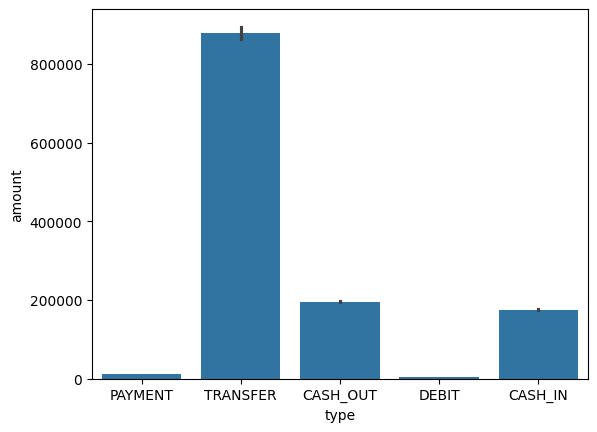

In [ ]:
sns.barplot(x='type', y='amount', data=data)


<Axes: xlabel='type', ylabel='count'>

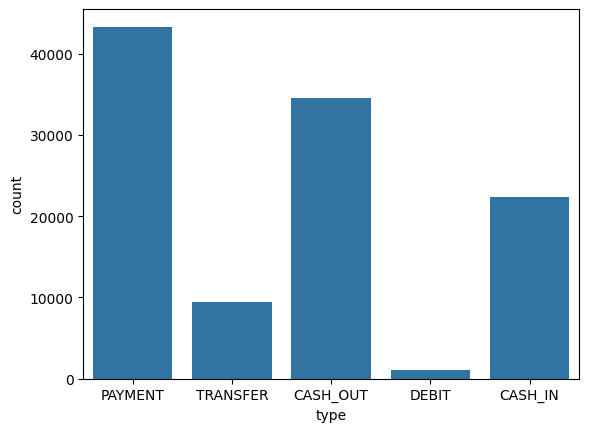

In [ ]:
sns.countplot(x='type', data=data)


[link text](https://)#Data preprocessing
Data cleainig(Missing Values, Outliers, and Multi-collinearity): Handling Missing Values:
checking for missing values. If there are any missing values, either impute them using methods like filling with 0, mean, or median, or drop the rows/columns depending on the situation.

Handling missing value

In [ ]:
print('no of missing value in the column')
df.isnull().sum()

no of missing value in the column


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,1
isFraud,1


In [ ]:
# Find rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Print the rows with missing values
print(rows_with_missing_values)

# Alternatively, you can get the row indices with missing values
rows_with_missing_indices = df[df.isnull().any(axis=1)].index
rows_with_missing_indices

        step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
110812    11  CASH_OUT  118777.61  C1510313227            0.0             0.0   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
110812  C601893033       1019293.0             NaN      NaN             NaN  


Index([110812], dtype='int64')

In [ ]:
df.shape

(110813, 11)

In [ ]:

# Drop rows with missing values
df = df.dropna()

# Print the shape of the cleaned DataFrame
print(df.shape)

(110812, 11)


In [ ]:
df.shape

(110812, 11)

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


**Outlier Detection**

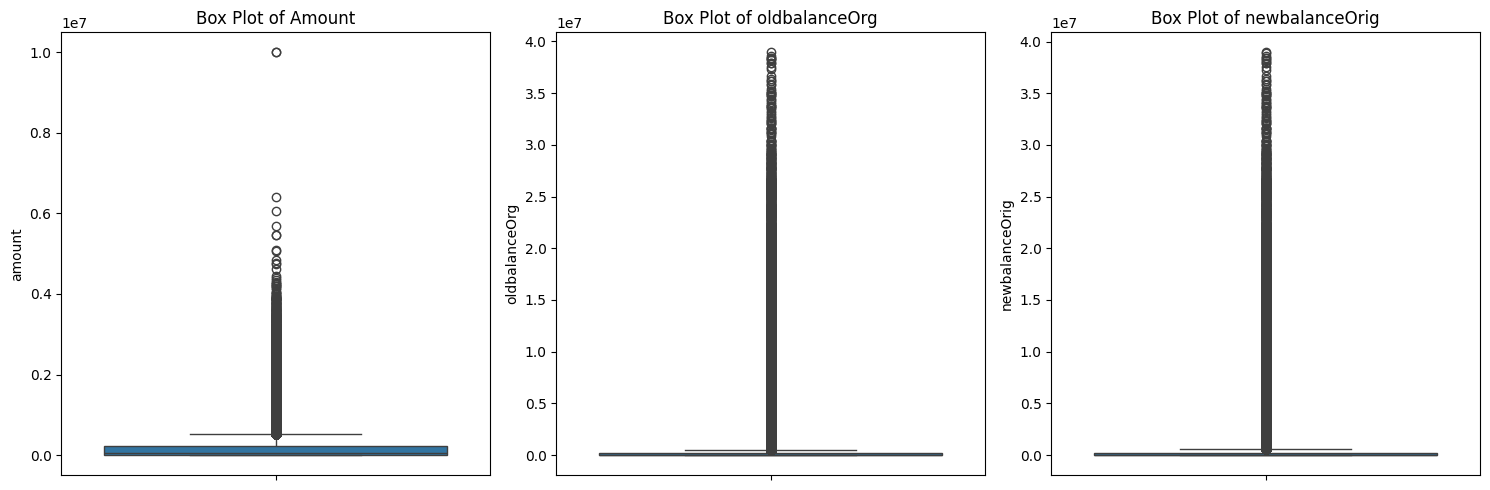

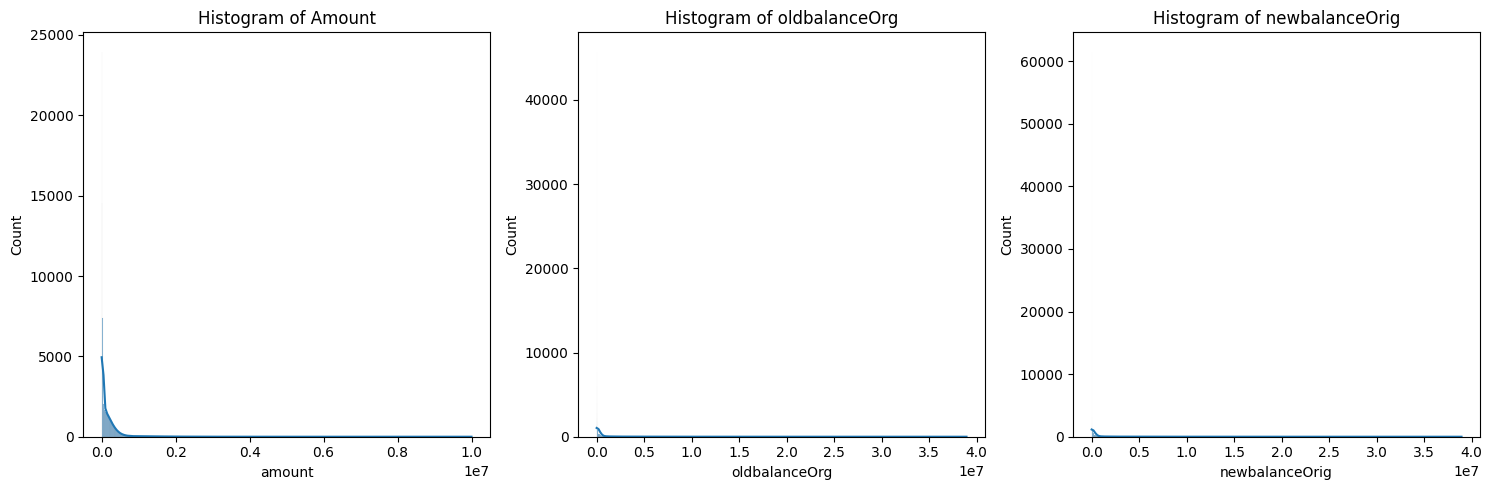

In [ ]:
# prompt: Use visualization techniques like box plots and histograms to detect outliers, especially for continuous variables like amount, oldbalanceOrg, newbalanceOrig

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Box plots for 'amount', 'oldbalanceOrg', 'newbalanceOrig'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['amount'])
plt.title('Box Plot of Amount')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['oldbalanceOrg'])
plt.title('Box Plot of oldbalanceOrg')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['newbalanceOrig'])
plt.title('Box Plot of newbalanceOrig')

plt.tight_layout()
plt.show()

# Histograms for 'amount', 'oldbalanceOrg', 'newbalanceOrig'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['amount'], kde=True)
plt.title('Histogram of Amount')

plt.subplot(1, 3, 2)
sns.histplot(df['oldbalanceOrg'], kde=True)
plt.title('Histogram of oldbalanceOrg')

plt.subplot(1, 3, 3)
sns.histplot(df['newbalanceOrig'], kde=True)
plt.title('Histogram of newbalanceOrig')

plt.tight_layout()
plt.show()


Outliers could indicate fraudulent behavior (e.g., extremely high transaction amounts).


In [ ]:
# prompt: Check if variables like oldbalanceOrg and newbalanceOrig or oldbalanceDest and newbalanceDest are highly correlated.
# Use correlation matrix or Variance Inflation Factor (VIF) to detect multicollinearity, and remove or combine redundant variables if necessary.

# Calculate the correlation matrix for the specified variables
correlation_matrix = df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()

print(correlation_matrix)

# Analyze the correlation matrix to identify highly correlated variables
# High correlation values (close to 1 or -1) indicate a strong linear relationship
# You can decide on a threshold for considering variables as highly correlated
# (e.g., correlation coefficient > 0.8 or < -0.8)


# Calculate Variance Inflation Factor (VIF) to detect multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the DataFrame with the relevant variables
X = df[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

# Analyze VIF values:
# A VIF greater than 5 or 10 indicates a potential multicollinearity issue.

# If you identify highly correlated variables using either correlation or VIF:
# 1. Remove one of the correlated variables.
# 2. Combine the correlated variables (e.g., create a new variable that represents the average or sum).
# 3. Use dimensionality reduction techniques like Principal Component Analysis (PCA).

# Example: If 'oldbalanceOrg' and 'newbalanceOrig' are highly correlated, you might choose to remove one of them.
# df = df.drop('oldbalanceOrg', axis=1)

                oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
oldbalanceOrg        1.000000        0.998911        0.100822        0.070228
newbalanceOrig       0.998911        1.000000        0.102394        0.069191
oldbalanceDest       0.100822        0.102394        1.000000        0.940235
newbalanceDest       0.070228        0.069191        0.940235        1.000000
          feature         VIF
0   oldbalanceOrg  519.238977
1  newbalanceOrig  519.743173
2  oldbalanceDest   10.049634
3  newbalanceDest    9.971601


**2 Handling Categorical Data (type column):**


The type column contains categorical values like "CASH-IN", "CASH-OUT", etc. we need to convert them into numeric representations:
we can use Hot encondin,label enconding etc


In [ ]:
# let's handle the categorical data
df = pd.get_dummies(df, columns=['type'], drop_first=True)

**Removing irrelevant feature**

Some columns might not be useful for the model or could introduce noise. For example, nameOrig and nameDest are identifiers and don’t provide useful information for the prediction:

In [ ]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)


Feature Engineering:
Creating new features such as balance_delta_orig and balance_delta_dest can provide valuable insights into sudden changes in balances, which are often key indicators of potential fraud

we can create features like balance_delta_orig = oldbalanceOrg - newbalanceOrig and balance_delta_dest = oldbalanceDest - newbalanceDest, which measure sudden changes in balances. it can lead over fitting so i am skipping it

In [ ]:

# Feature Engineering:

df['balance_delta_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_delta_dest'] = df['oldbalanceDest'] - df['newbalanceDest']

Feature Scaling:


Since your numerical columns (amount, oldbalanceOrg, newbalanceOrig, etc.) can have widely varying scales, you need to normalize or standardize them. Most models perform better when the features are on a similar scale

In [ ]:
df.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'balance_delta_orig',
       'balance_delta_dest'],
      dtype='object')

In [ ]:
# let's
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and you want to scale numerical features
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'balance_delta_orig',
       'balance_delta_dest']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balance_delta_orig,balance_delta_dest
0,0.0,0.000984,0.004369,0.004116,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.115086,0.748602
1,0.0,0.000186,0.000546,0.000498,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.114379,0.748602
2,0.0,0.000018,0.000005,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.114230,0.748602
3,0.0,0.000018,0.000005,0.000000,0.000623,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.114230,0.749010
4,0.0,0.001167,0.001067,0.000767,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.115248,0.748602


Feature Importance from Domain Knowledge:
Amount: Larger amounts may be more suspicious.
OldbalanceOrig, NewbalanceOrig: Big changes in balance can indicate fraud.
Type: Certain transaction types like CASH_OUT or TRANSFER might be more associated with fraud.
isFlaggedFraud: Strong predictor for illegal attempts.

let's check which feature is important

In [ ]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [ ]:
print(X)

        step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        0.0  0.000984       0.004369        0.004116        0.000000   
1        0.0  0.000186       0.000546        0.000498        0.000000   
2        0.0  0.000018       0.000005        0.000000        0.000000   
3        0.0  0.000018       0.000005        0.000000        0.000623   
4        0.0  0.001167       0.001067        0.000767        0.000000   
...      ...       ...            ...             ...             ...   
110807   1.0  0.032782       0.002722        0.011139        0.000448   
110808   1.0  0.003663       0.001035        0.000095        0.000000   
110809   1.0  0.001951       0.000095        0.000000        0.000000   
110810   1.0  0.002121       0.000000        0.000000        0.000000   
110811   1.0  0.026649       0.002386        0.000000        0.000000   

        newbalanceDest  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
0             0.000000             0.0            0.0 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.8)
x_pca = pca.fit_transform(X)
x_pca.shape

(110812, 2)

In [ ]:
df.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'balance_delta_orig',
       'balance_delta_dest'],
      dtype='object')

In [ ]:
# X = df1.drop(['isFraud','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest'], axis=1)
# y = df1['isFraud']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)
# from sklearn.metrics import classification_report, roc_auc_score, roc_curve
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

# auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
# print(f"AUC: {auc}")


In [ ]:
# prompt: use logistic regression with threshold of 0.95

from sklearn.linear_model import LogisticRegression

# Assuming X and y are defined as in your original code
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]

# Apply threshold of 0.95
y_pred = (y_pred_proba >= 0.60).astype(int)

# Evaluate the model with the new threshold
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33210
         1.0       0.00      0.00      0.00        34

    accuracy                           1.00     33244
   macro avg       0.50      0.50      0.50     33244
weighted avg       1.00      1.00      1.00     33244

AUC: 0.9445950015055706


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


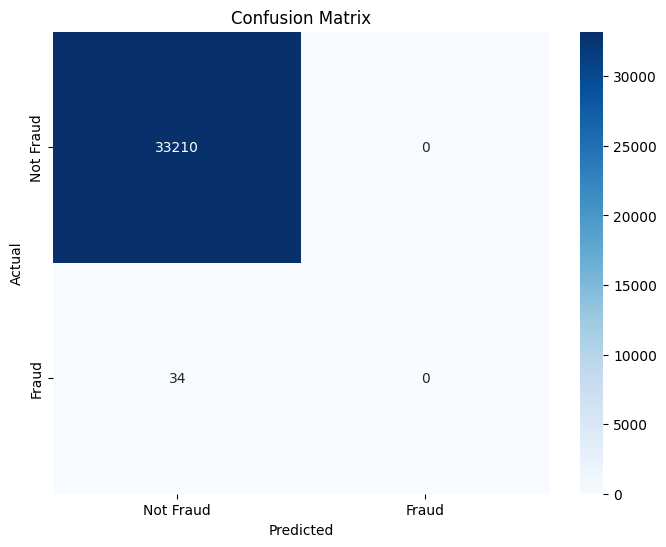

In [ ]:
# prompt: draw confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined from your previous code
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

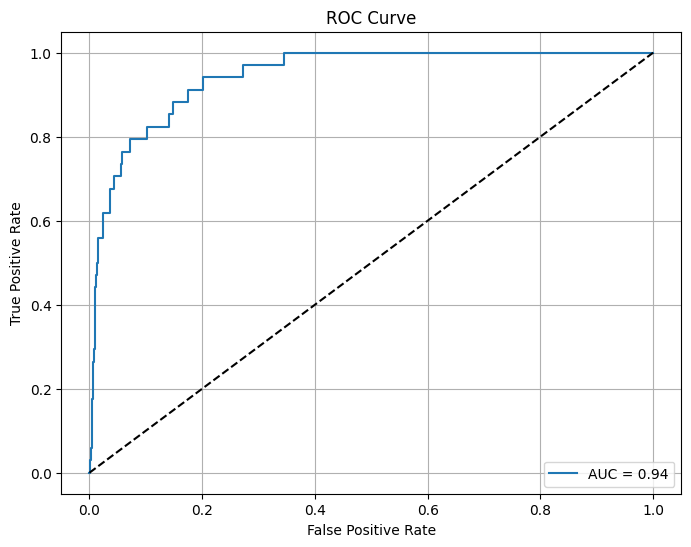

In [ ]:
# prompt: plot auc roc curve
!pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score  # Import roc_curve

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# prompt: predict new unseen data

import numpy as np

# Assuming 'logreg_model', 'scaler', and 'df' (with relevant columns) are defined from the previous code

# Example of new unseen data (replace with your actual data)
new_data = pd.DataFrame({
    'step': [100],
    'type_CASH_OUT': [0],
    'type_DEBIT': [0],
    'type_PAYMENT': [0],
    'type_TRANSFER': [1],
    'amount': [10000],
    'oldbalanceOrg': [15000],
    'newbalanceOrig': [5000],
    'oldbalanceDest': [20000],
    'newbalanceDest': [30000],
    'isFlaggedFraud': [0],
    'balance_delta_orig': [10000],
    'balance_delta_dest': [-10000]
})


# Scale the new data using the same scaler used for training data
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'balance_delta_orig',
       'balance_delta_dest']
new_data[numerical_features] = scaler.transform(new_data[numerical_features])


# Make predictions
new_predictions = logreg_model.predict(new_data)
new_predictions_proba = logreg_model.predict_proba(new_data)[:,1]

print(f"Predictions: {new_predictions}")
print(f"Prediction Probabilities: {new_predictions_proba}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- balance_delta_dest
- isFlaggedFraud
- newbalanceDest
- newbalanceOrig
- oldbalanceDest
- ...


In [ ]:
# prompt: binary number

# Assuming 'logreg_model', 'scaler', and 'df' (with relevant columns) are defined from the previous code

# Example of new unseen data (replace with your actual data)
new_data = pd.DataFrame({
    'step': [100],
    'type_CASH_OUT': [0],
    'type_DEBIT': [0],
    'type_PAYMENT': [0],
    'type_TRANSFER': [1],
    'amount': [10000],
    'oldbalanceOrg': [15000],
    'newbalanceOrig': [5000],
    'oldbalanceDest': [20000],
    'newbalanceDest': [30000],
    'isFlaggedFraud': [0],
    'balance_delta_orig': [10000],
    'balance_delta_dest': [-10000]
})


# Scale the new data using the same scaler used for training data
numerical_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'balance_delta_orig',
       'balance_delta_dest']
new_data[numerical_features] = scaler.transform(new_data[numerical_features])


# Make predictions
new_predictions = logreg_model.predict(new_data)
new_predictions_proba = logreg_model.predict_proba(new_data)[:,1]

print(f"Predictions: {new_predictions}")
print(f"Prediction Probabilities: {new_predictions_proba}")

In [ ]:
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
# Assuming 'logreg_model', 'scaler', and 'df' (with relevant columns) are defined from the previous code

# Example of new unseen data (replace with your actual data)
new_data = pd.DataFrame({
    'step': [100],
    'type_CASH_OUT': [0],
    'type_DEBIT': [0],
    'type_PAYMENT': [0],
    'type_TRANSFER': [1],
    'amount': [10000],
    'oldbalanceOrg': [15000],
    'newbalanceOrig': [5000],
    'oldbalanceDest': [20000],
    'newbalanceDest': [30000],
    'isFlaggedFraud': [0],
    'balance_delta_orig': [10000],
    'balance_delta_dest': [-10000]
}, index=[0]) # Adding index to the DataFrame


# Ensure the new data has the same columns as the training

               Feature  Importance
10       type_TRANSFER    2.441836
7        type_CASH_OUT    1.772060
11  balance_delta_orig    0.631861
1               amount    0.480393
6       isFlaggedFraud    0.000000
2        oldbalanceOrg   -0.164522
8           type_DEBIT   -0.342736
3       newbalanceOrig   -0.445123
4       oldbalanceDest   -0.655815
5       newbalanceDest   -0.679046
12  balance_delta_dest   -2.124221
9         type_PAYMENT   -2.606644
0                 step   -4.008865


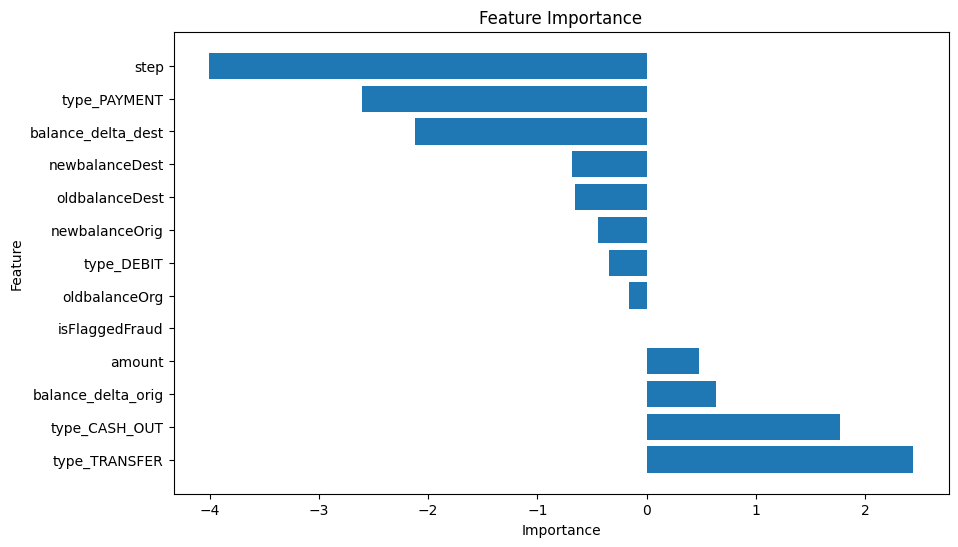

In [ ]:
# prompt: feature important

# Assuming 'logreg_model' is your trained Logistic Regression model and 'X' is your feature matrix
feature_importances = logreg_model.coef_[0]

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

# You can also visualize the feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
# df.columns

In [ ]:
# df=df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest',],axis=1)

In [ ]:
# df.columns

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler

# # Select two features for 2D visualization
# X_train_2d = X_train[['amount', 'balance_delta_orig']].copy()
# X_test_2d = X_test[['amount', 'balance_delta_orig']].copy()

# # Standardizing the data for better visualization (optional)
# scaler = StandardScaler()
# X_train_2d_scaled = scaler.fit_transform(X_train_2d)
# X_test_2d_scaled = scaler.transform(X_test_2d)

# # Train the logistic regression model on these two features
# model_2d = LogisticRegression(class_weight={0: 0.30, 1: 1}, solver='liblinear')
# model_2d.fit(X_train_2d_scaled, y_train)

# # Create a mesh grid over the feature space
# x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
# y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
#                      np.arange(y_min, y_max, 0.1))

# # Predict over the mesh grid
# Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
# print(f"AUC: {auc}")

# # Plot the decision boundary and data points
# plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
# plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], c=y_train, edgecolors='k', marker='o', s=20, cmap=plt.cm.RdYlBu)
# plt.title('Logistic Regression Decision Boundary')
# plt.xlabel('Amount (scaled)')
# plt.ylabel('Balance Delta Origin (scaled)')
# plt.show()


In [ ]:
# # prompt: check precison and recall ot the logistic regression model on these two features

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import precision_score, recall_score

# # Assuming X_test_2d_scaled and y_test are defined

# # Make predictions on the test set
# y_pred_2d = model_2d.predict(X_test_2d_scaled)

# # Calculate precision and recall
# precision = precision_score(y_test, y_pred_2d)
# recall = recall_score(y_test, y_pred_2d)

# print(f"Precision: {precision}")
# print(f"Recall: {recall}")

In [ ]:
# prompt: comfusion matrix and plot what 0 and 1 represent

# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming y_test and y_pred are your true and predicted labels
# # Replace these with your actual variables

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot the confusion matrix using seaborn
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Not Fraud (0)', 'Fraud (1)'],
#             yticklabels=['Not Fraud (0)', 'Fraud (1)'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# # prompt: use logistic regression

# # Use a list of column names to select the desired features
# X = df[['step', 'amount', 'isFlaggedFraud', 'type_CASH_OUT',
#        'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'balance_delta_orig',
#        'balance_delta_dest']]  # Changed to a list of column names
# y = df['isFraud']

# # ... rest of the code remains the same ...

In [ ]:

# import xgboost as xgb
# from sklearn.metrics import accuracy_score

# # Assuming X_train, X_test, y_train, y_test are already defined

# # Create and train the XGBoost model
# xgb_model = xgb.XGBClassifier(random_state=42)
# xgb_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_xgb = xgb_model.predict(X_test)

# # Evaluate the model
# print(classification_report(y_test, y_pred_xgb))

# # Calculate AUC
# auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
# print(f"AUC (XGBoost): {auc_xgb}")

# # Calculate accuracy
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# print(f"Accuracy (XGBoost): {accuracy_xgb}")

# # Confusion matrix
# cm_xgb = confusion_matrix(y_test, y_pred_xgb)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix (XGBoost)')
# plt.show()

In [ ]:
# Selecting features and target variable
X = df.drop(columns=['isFraud'])  # drop target variable
y = df['isFraud']  # target variable

# Convert categorical variables to dummy/one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Importing necessary libraries
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Balanced Random Forest Classifier
classifier = BalancedRandomForestClassifier(random_state=42)

# Train the classifier on the SMOTE data
classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_brf = classifier.predict(X_test)
y_proba_brf = classifier.predict_proba(X_test)[:, 1]

# Print classification report for the predictions made on the SMOTE data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_brf))


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Classification Report (With SMOTE):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22145
         1.0       0.19      0.83      0.31        18

    accuracy                           1.00     22163
   macro avg       0.60      0.92      0.66     22163
weighted avg       1.00      1.00      1.00     22163



In [ ]:
print("HOC AUC Score (With SMOTE):", roc_auc_score(y_test, y_proba_brf))

HOC AUC Score (With SMOTE): 0.9984195077895687


In [ ]:
# prompt: create outlier free data frame and remove outlier in it

# Assuming 'df' is your DataFrame
def remove_outliers_iqr(df, columns, factor=1.5):
  """
  Removes outliers from a DataFrame using the Interquartile Range (IQR) method.

  Args:
    df: The DataFrame.
    columns: A list of column names to check for outliers.
    factor: The IQR multiplier for outlier detection (default is 1.5).

  Returns:
    A new DataFrame with outliers removed.
  """

  df_outlier_free = df.copy()
  for column in columns:
    Q1 = df_outlier_free[column].quantile(0.25)
    Q3 = df_outlier_free[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    df_outlier_free = df_outlier_free[
        (df_outlier_free[column] >= lower_bound) & (df_outlier_free[column] <= upper_bound)
    ]
  return df_outlier_free

# Example usage:
columns_to_check = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
df_no_outliers = remove_outliers_iqr(df, columns_to_check)

# Now df_no_outliers contains the data with outliers removed from the specified columns.

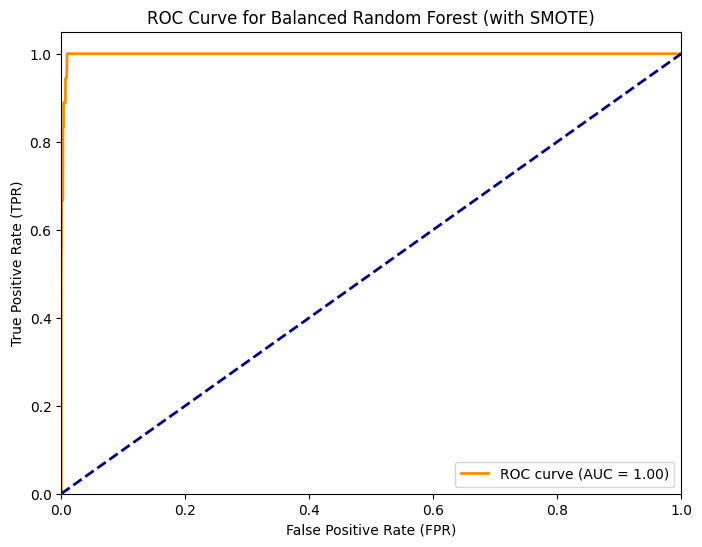

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_proba_brf)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_proba_brf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Plotting a diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Balanced Random Forest (with SMOTE)')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


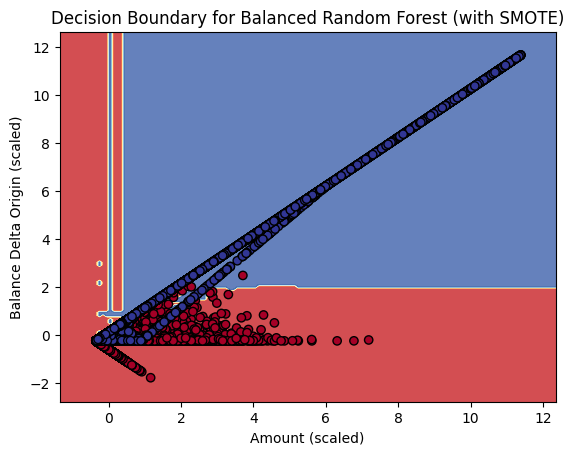

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select two features for 2D visualization
X_train_2d = X_train_smote[['amount', 'balance_delta_orig']]
X_test_2d = X_test[['amount', 'balance_delta_orig']]

# Standardize the features
scaler = StandardScaler()
X_train_2d_scaled = scaler.fit_transform(X_train_2d)
X_test_2d_scaled = scaler.transform(X_test_2d)

# Train the Balanced Random Forest Classifier on these two features
classifier_2d = BalancedRandomForestClassifier(random_state=42)
classifier_2d.fit(X_train_2d_scaled, y_train_smote)

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict over the mesh grid
Z = classifier_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Scatter plot the data points
plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], c=y_train_smote, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu)
plt.title('Decision Boundary for Balanced Random Forest (with SMOTE)')
plt.xlabel('Amount (scaled)')
plt.ylabel('Balance Delta Origin (scaled)')
plt.show()
